In [56]:
import pickle

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [57]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [58]:
with open(f'ptv_result_large_low.pickle', mode='rb') as fp:
    ptv_result = pickle.load(fp)

In [59]:
with open(f'ptv_result_large_high.pickle', mode='rb') as fp:
    ptv_result2 = pickle.load(fp)

In [60]:
ptv_result = ptv_result.sort_values(by='y', ascending=True).values
ptv_result2 = ptv_result2.sort_values(by='y', ascending=True).values

In [61]:
Grid_X, Grid_Y = 200, 130

In [62]:
width, height = 2000, 1300

In [63]:
x = np.linspace(0, width, Grid_X)
y = np.linspace(0, height, Grid_Y)
xx, yy = np.meshgrid(x, y)

u = np.zeros([Grid_Y, Grid_X])
v = np.zeros([Grid_Y, Grid_X])
u2 = np.zeros([Grid_Y, Grid_X])
v2 = np.zeros([Grid_Y, Grid_X])
u3 = np.zeros([Grid_Y, Grid_X])
v3 = np.zeros([Grid_Y, Grid_X])

In [64]:
sigma = 1.24 * np.sqrt(height * width / ptv_result.shape[0])
sigma2 = 1.24 * np.sqrt(height * width / ptv_result2.shape[0])

In [65]:
for j in tqdm(range(0, Grid_Y)):
    upper_limit = ptv_result[np.where(ptv_result[:, 1] >= height // Grid_Y * j)]
    upper_bottom_limit = upper_limit[np.where(upper_limit[:, 1] < height // Grid_Y * (j + 1))]

    upper_limit2 = ptv_result2[np.where(ptv_result2[:, 1] >= height // Grid_Y * j)]
    upper_bottom_limit2 = upper_limit2[np.where(upper_limit2[:, 1] < height // Grid_Y * (j + 1))]

    tmp_y = pd.DataFrame(data=upper_bottom_limit[:, :4], columns=['x', 'y', 'dx', 'dy']).sort_values(by='x', ascending=True).values
    tmp_y2 = pd.DataFrame(data=upper_bottom_limit2[:, :4], columns=['x', 'y', 'dx', 'dy']).sort_values(by='x', ascending=True).values

    for i in range(0, Grid_X):
        left_limit = tmp_y[np.where(tmp_y[:, 0] >= width // Grid_X * i)]
        left_right_limit = left_limit[np.where(left_limit[:, 0] < width // Grid_X * (i + 1))]
        tmp = left_right_limit

        left_limit2 = tmp_y2[np.where(tmp_y2[:, 0] >= width // Grid_X * i)]
        left_right_limit2 = left_limit2[np.where(left_limit2[:, 0] < width // Grid_X * (i + 1))]
        tmp2 = left_right_limit2

        top_u, top_v = 0, 0
        bottom = 0
        omega = 0

        for k in range(tmp.shape[0]):
            r = np.sqrt((width // Grid_X * (i + 0.5) - tmp[k][0])**2 + (height // Grid_Y * (j + 0.5) - tmp[k][1])**2)
            omega = np.exp(- (r / sigma)**2)

            top_u += omega * tmp[k][2]
            top_v += omega * tmp[k][3]
            bottom += omega

        if omega == 0:
            u[j, i] = np.nan
            v[j, i] = np.nan
        else:
            u[j, i] = top_u / bottom
            v[j, i] = top_v / bottom

        top_u, top_v = 0, 0
        bottom = 0
        omega = 0

        for k in range(tmp2.shape[0]):
            r = np.sqrt((width // Grid_X * (i + 0.5) - tmp2[k][0])**2 + (height // Grid_Y * (j + 0.5) - tmp2[k][1])**2)
            omega = np.exp(- (r / sigma2)**2)

            top_u += omega * tmp2[k][2]
            top_v += omega * tmp2[k][3]
            bottom += omega

        if omega == 0:
            u2[j, i] = np.nan
            v2[j, i] = np.nan
        else:
            u2[j, i] = top_u / bottom
            v2[j, i] = top_v / bottom

        if not np.isnan(u[j, i]) and not np.isnan(u2[j, i]) and np.sqrt(u[j, i]**2 + v[j, i]**2) > 8:
            u3[j, i] = u2[j, i]
            v3[j, i] = v2[j, i]
        elif not np.isnan(u[j, i]):
            u3[j, i] = u[j, i]
            v3[j, i] = v[j, i]
        elif np.isnan(u[j, i]) and not np.isnan(u2[j, i]):
            u3[j, i] = u2[j, i]
            v3[j, i] = v2[j, i]
        else:
            u3[j, i] = np.nan
            v3[j, i] = np.nan

100%|██████████| 130/130 [00:14<00:00,  8.90it/s]


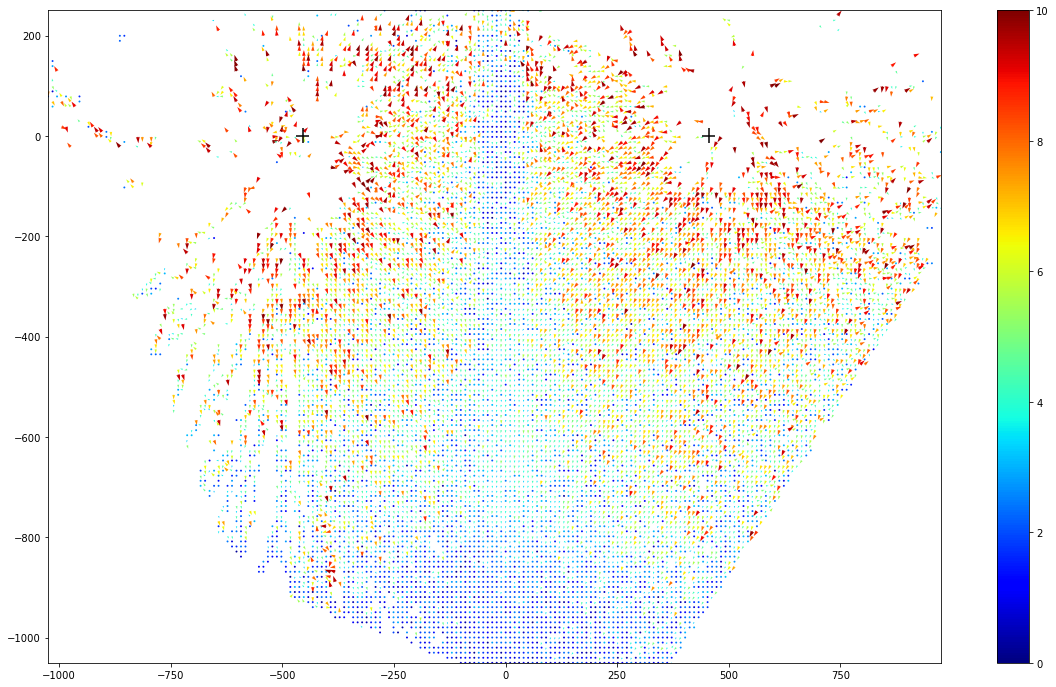

In [66]:
fig, ax = plt.subplots(figsize=(20, 12))
plt.xlim(-1025, 975)
plt.ylim(-1050, 250)
ax.hlines(0, -440, -470, color='k')
ax.vlines(-455, -15, 15, color='k')
ax.hlines(0, 440, 470, color='k')
ax.vlines(455, -15, 15, color='k')

plt.quiver(xx-1025, -yy+250, u, -v, np.sqrt(u**2 + v**2), cmap="jet")

plt.colorbar()
plt.clim(0, 10)
plt.show()

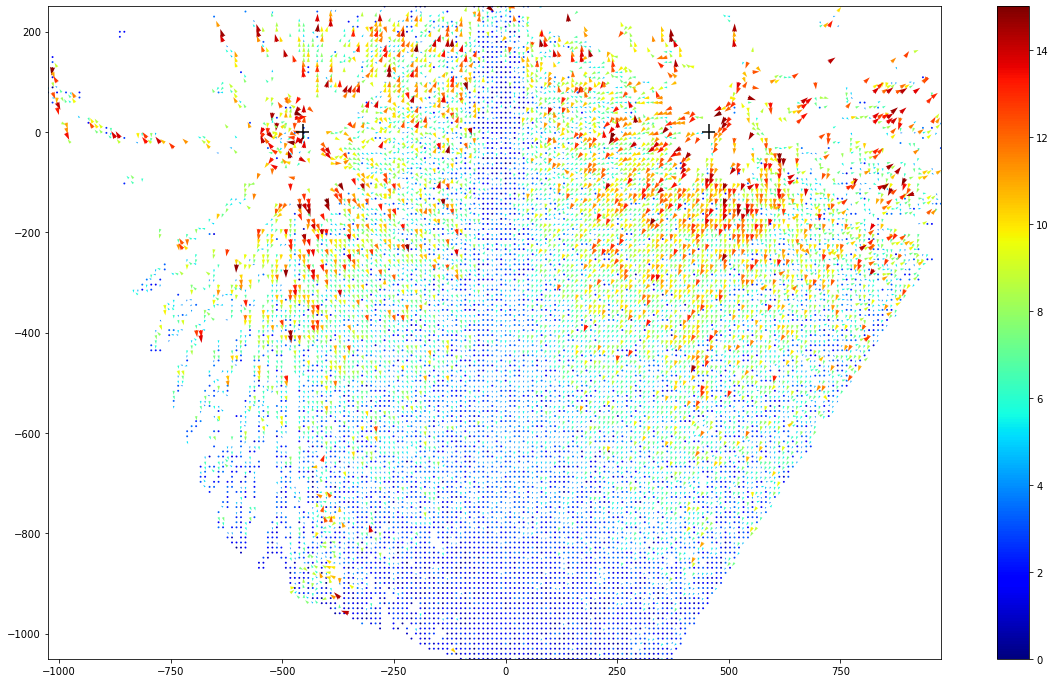

In [69]:
fig, ax = plt.subplots(figsize=(20, 12))
plt.xlim(-1025, 975)
plt.ylim(-1050, 250)
ax.hlines(0, -440, -470, color='k')
ax.vlines(-455, -15, 15, color='k')
ax.hlines(0, 440, 470, color='k')
ax.vlines(455, -15, 15, color='k')

plt.quiver(xx-1025, -yy+250, u2, -v2, np.sqrt(u2**2 + v2**2), cmap="jet")

plt.colorbar()
plt.clim(0, 15)
plt.show()

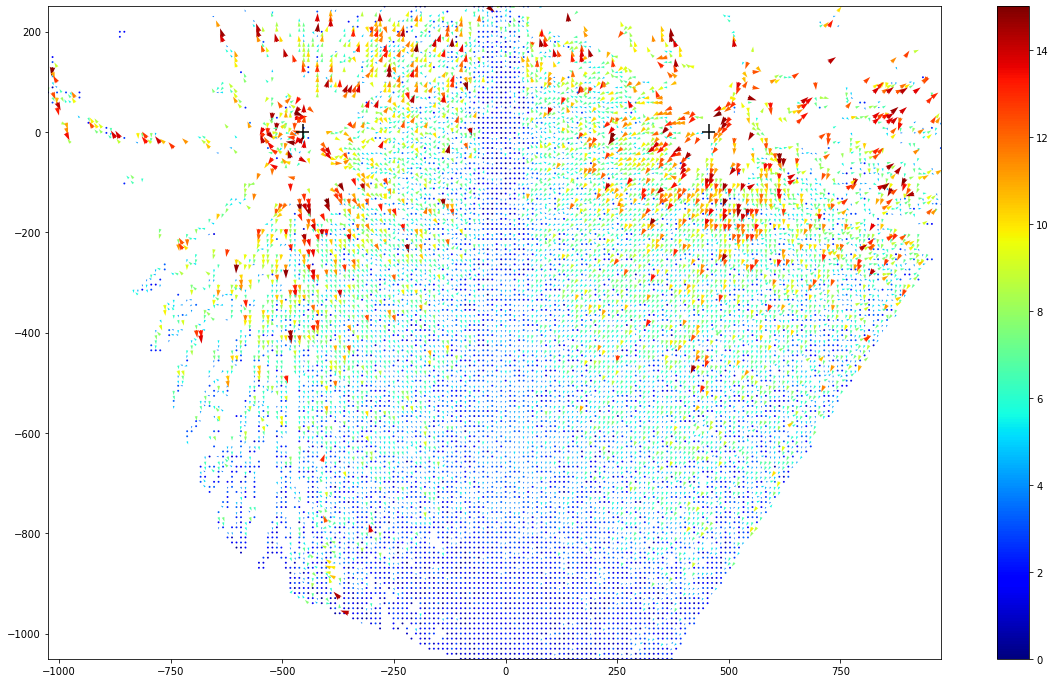

In [73]:
fig, ax = plt.subplots(figsize=(20, 12))
plt.xlim(-1025, 975)
plt.ylim(-1050, 250)
ax.hlines(0, -440, -470, color='k')
ax.vlines(-455, -15, 15, color='k')
ax.hlines(0, 440, 470, color='k')
ax.vlines(455, -15, 15, color='k')

plt.quiver(xx-1025, -yy+250, u3, -v3, np.sqrt(u3**2 + v3**2), cmap="jet")

plt.colorbar()
plt.clim(0, 15)
plt.show()